<a href="https://colab.research.google.com/github/alexanderagudelo/AnalisisExploratorioDeDatos/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1

## 1. Contexto del análisis


La Gran encuesta integrada de hogares es una encuesta mediante la cual se solicita información sobre las condiciones de empleo de las personas (si trabajan, en qué trabajan, cuánto ganan, si tienen seguridad social en salud o si están buscando empleo), además de las características generales de la población como sexo, edad, estado civil y nivel educativo, se pregunta sobre sus fuentes de ingresos. La GEIH proporciona al país información a nivel nacional, cabecera - resto, regional, departamental, y para cada una de las capitales de los departamentos.

## 2. Pregunta SMART

A partir de los muchos datos obtenido en la Gran encuesta interada de hogares se pueden desarrollar muchos modelos economicos. En este trabajo se pretende estudiar la teoria del capital humano Jacob Mincer el cual relaciona el ingreso de los individuos con la educación y la edad. Adicionalmente se desea determinar si existe diferencia salarial debido al genero.

In [1]:
# Cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Cargar la base de datos
datos = pd.read_stata("/content/drive/MyDrive/ICESI/datasets/GEIH_Pet_IV2021.dta")
datos.head()

/usr/local/lib/python3.9/dist-packages/pandas/io/stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,REGIS,AREA,P6360,P6360S1,P388,P6440,...,P31471,P31472,P50901,P50902,P50903,P1661,P16611,P16612,trim,fax_corr
0,5570718.0,1.0,1.0,1.0,90,05,NaN,,5,2.0,...,,,,,,,,,4.0,393.528163
1,5570718.0,1.0,2.0,1.0,90,05,NaN,,,NaN,...,,,,,,,,,4.0,393.528163
2,5570719.0,1.0,1.0,1.0,90,05,NaN,,5,2.0,...,,,,,,,,,4.0,482.462052
3,5570719.0,1.0,2.0,1.0,90,05,NaN,,5,2.0,...,,,,,,,,,4.0,482.462052
4,5570719.0,1.0,4.0,1.0,90,05,NaN,,5,2.0,...,,,,,,,,,4.0,482.462052


## 3. Descripcion de los datos

Muchas de las variables en la base de datos estan nombradas mediante codigos, el significado de estas variables puede encontrarse en el pdf adjunto en el github. Para responder la pregunta SMART se decide considerar los siguientes variables:

| Nombre de la variable | Nombre en la base de datos | Descripción | Tipo de variable |
|:-|:-|:-|:-|
| Ingreso | P6500 | Ingreso mensual | Cuantitativa continua |
| Escolaridad | ESC | Años de educación aprobados | Cuantitativa discreta |
| Edad | P6040 | Edad del individuo | Cuantitativa discreta |
| Genero | P6020 | 1.0 = Hombre, 2.0 = Mujer | Cualitativa Nominal |

In [3]:
# Codigos de las variables de interes encontradas en el pdf adjunto
Ingreso = "P6500"
Escolaridad = "ESC"
Edad = "P6040"
Genero = "P6020"

In [4]:
# DataFrame de interes
df = datos[[Ingreso, Escolaridad, Edad, Genero]]
df.columns = ["Ingreso", "Escolaridad", "Edad", "Genero"]
df.head()

,Ingreso,Escolaridad,Edad,Genero
0,NaN,16.0,60.0,1.0
1,NaN,16.0,58.0,2.0
2,NaN,16.0,29.0,2.0
3,NaN,16.0,38.0,1.0
4,NaN,11.0,74.0,2.0


## 4. Análisis general del dataset

Para ver el número de datos del dataframe de interes, el numero de NA de cada varaible y el tipo de variable se utiliza la función `info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68864 entries, 0 to 68863
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ingreso      18480 non-null  float64
 1   Escolaridad  68856 non-null  float64
 2   Edad         68864 non-null  float64
 3   Genero       68864 non-null  float64
dtypes: float64(4)
memory usage: 2.6 MB


Observaciones:

* Hay en su totalidad 68864 datos.
* La variable **Ingreso** unicamente tiene 18480 datos no nulos, es decir, aproximamente 3/4 de los datos son NA.
* La variable **Genero** aparece como tipo `float64` cuando deberia ser `object`.

A continuación se corrige el tipo de la variable **Genero** y se da un nombre descriptivo a las categorias.


In [6]:
df.Genero = df.Genero.astype("object")
df.Genero = df.Genero.replace(1.0, "Hombre")
df.Genero = df.Genero.replace(2.0, "Mujer")

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## 5. Análisis Univariado

Dado que la variable ingreso es la variable dependiente del modelo se decide eliminar todos los NA de esta variable

In [7]:
df = df.dropna(subset = ["Ingreso"]).reset_index(drop=True)

A continaución se verifica el estado de NA de las otras variables luego de eliminar las filas con NA en ingreso.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18480 entries, 0 to 18479
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ingreso      18480 non-null  float64
 1   Escolaridad  18479 non-null  float64
 2   Edad         18480 non-null  float64
 3   Genero       18480 non-null  object 
dtypes: float64(3), object(1)
memory usage: 577.6+ KB


Unicamente quedo un dato faltante de en la variable escolaridad, se decide imputar ese dato por la media.

In [9]:
df.Escolaridad = df.Escolaridad.replace(np.nan, df.Escolaridad.mean())

### Estadísticas descriptivas de las variables cuantitativas

In [10]:
df.describe()

,Ingreso,Escolaridad,Edad
count,1.848000e+04,18480.000000,18480.000000
mean,1.386319e+06,11.869095,37.535552
std,1.403715e+06,3.693536,12.354940
min,0.000000e+00,0.000000,12.000000
25%,9.085240e+05,11.000000,27.000000
50%,9.100000e+05,11.000000,36.000000
75%,1.400000e+06,14.000000,47.000000
max,3.500000e+07,26.000000,87.000000


Observaciones: 

* La variable **Escolaridad** tiene valores desde 0 (individuo sin nungun tipo de educación formal) y 26 (individuo con probablemente maestria y doctorado).
* La mediana de la educación es 11 (individuo con titulo de bachiller), es decir, la mitad de la población son bachilleres y otra mitad no lo son.
* La variable **Edad** tiene valores desde 12 hasta 87, luego hay individuos menores de edad en la muestra.
* La variable **Ingreso** esta medida en pesos lo cual genera que los salarios sean de cientos de miles o millones, mientras que las otras varaibles estan en unidades de pocas decenas.

Se decide escalar el salario para colocarlo en unidades de millones de pesos, para esto se divide la varaible por 1.000.000.

In [11]:
df.Ingreso = df.Ingreso / 1e6

Verifiquemos que el cambio tuvo el efecto deseado

In [12]:
df.describe()

,Ingreso,Escolaridad,Edad
count,18480.000000,18480.000000,18480.000000
mean,1.386319,11.869095,37.535552
std,1.403715,3.693536,12.354940
min,0.000000,0.000000,12.000000
25%,0.908524,11.000000,27.000000
50%,0.910000,11.000000,36.000000
75%,1.400000,14.000000,47.000000
max,35.000000,26.000000,87.000000


### Distribuación de la variable cuantitativa continua.

Para visualizar la distribuación de la variable **Ingreso** se realiza un histograma.



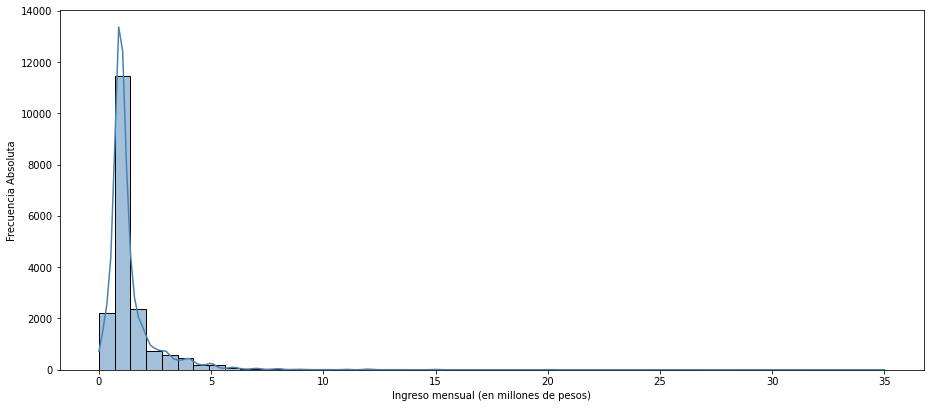

In [13]:
fig = plt.figure(figsize=(12, 5)) 
ax = fig.add_axes([0, 0, 1, 1])
ax = sns.histplot(df.Ingreso, kde=True, color="steelblue", bins=50)
plt.xlabel("Ingreso mensual (en millones de pesos)")
plt.ylabel("Frecuencia Absoluta")
plt.show()

El histograma muestra que los salarios se distribuyen con una cola larga a la derecha, es decir, existen muchos indivuduos con salarios cercanos a la media y unos pocos indicudios con salarios mucho mas grande a la media.

### Tabla de frecuencias de la variable cualitativa

In [14]:
df.Genero.value_counts()

Hombre    9640
Mujer     8840
Name: Genero, dtype: int64

Hay 9640 hombres y 8840 mujeres, como estos números son relativamente cercanos, podemos decir que esta variable es balanceada.

Al ser la varible nominal se decide realizar un `OneHotEncoding` a esta variable.

In [15]:
onehotencoder = OneHotEncoder()
dfOneHot = pd.DataFrame(onehotencoder.fit_transform(df.Genero.values.reshape(-1,1)).toarray(), 
                 columns=["Hombre", "Mujer"])
df = df.join(dfOneHot)
df

,Ingreso,Escolaridad,Edad,Genero,Hombre,Mujer
0,3.000000,19.0,36.0,Mujer,0.0,1.0
1,2.650000,16.0,27.0,Hombre,1.0,0.0
2,0.908526,12.0,22.0,Mujer,0.0,1.0
3,2.600000,14.0,45.0,Hombre,1.0,0.0
4,3.000000,16.0,41.0,Mujer,0.0,1.0
...,...,...,...,...,...,...
18475,0.908526,11.0,22.0,Mujer,0.0,1.0
18476,1.600000,16.0,46.0,Mujer,0.0,1.0
18477,0.908526,14.0,30.0,Hombre,1.0,0.0
18478,0.908526,11.0,32.0,Mujer,0.0,1.0
